In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import codecs
import re
import os.path
import nltk
from nltk.stem import PorterStemmer
import string
import time

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, cross_val_score

### Charger les données 

In [2]:
##Chargement des données:
def load_pres(fname):
    alltxts = []
    alllabs = []
    s=codecs.open(fname, 'r','utf-8') # pour régler le codage
    while True:
        txt = s.readline()
        if(len(txt))<5:
            break
        #
        lab = re.sub(r"<[0-9]*:[0-9]*:(.)>.*","\\1",txt)
        txt = re.sub(r"<[0-9]*:[0-9]*:.>(.*)","\\1",txt)
        if lab.count('M') >0:
            alllabs.append(-1)
        else: 
            alllabs.append(1)
        alltxts.append(txt)
    return alltxts,alllabs


### Train set

In [144]:
path_train= r"C:\Users\actou\OneDrive\Documents\IODAA\ONTO-TAL\TAL\tuto_TAL-main\notebooks\ressources\AFDpresidentutf8\corpus.tache1.learn.utf8"
trainalltxts,trainalllabs = load_pres(path_train)

print("la longueur du training data_set est de:",len(trainalltxts),len(trainalllabs))
liste_1 = []
for i in trainalllabs: 
    if i == 1 : 
        liste_1.append(i)
print ("La taille des dataset ( texte + ettiquettes ) train sont ", len(trainalltxts), len(trainalllabs))       
print("La proportion d'etiquettes 1 est de:", (len(liste_1)/(len(trainalllabs))*100))
print("La proportion d'etiquettes -1 est de:", (100 - len(liste_1)/len(trainalllabs)*100))
print(" ")
print("EXTRAIT:") 
print(trainalltxts[:5])
print(trainalllabs[:5])
print(trainalltxts[-1])
print(trainalllabs[-1])

la longueur du training data_set est de: 57413 57413
La taille des dataset ( texte + ettiquettes ) train sont  57413 57413
La proportion d'etiquettes 1 est de: 86.89669587027329
La proportion d'etiquettes -1 est de: 13.103304129726709
 
EXTRAIT:
[" Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.\n", " D'abord merci de cet exceptionnel accueil que les Congolais, les Brazavillois, nous ont réservé cet après-midi.\n", " C'est toujours très émouvant de venir en Afrique car c'est probablement l'une des rares terres du monde où l'on ait conservé cette convivialité, cette amitié, ce respect de l'autre qui s'expriment avec chaleur, avec spontanéité et qui réchauffent le coeur de ceux qui arrivent et de ceux qui reçoivent.\n", ' Aucun citoyen français ne peut être indifférent à un séjour à Brazzaville.\n', ' Le Congo, que naguère le <nom> qualifia de "refuge pour la liberté", de "base de départ pour la libération", de "môle pou

### Test set 

In [143]:

path_test= r"C:\Users\actou\OneDrive\Documents\IODAA\ONTO-TAL\TAL\tuto_TAL-main\notebooks\ressources\AFDpresidentutf8\corpus.tache1.test.utf8"
#text = open("ressources/AFDpresidentutf8/corpus.tache1.test.utf8",encoding="utf-8")
testalltxts,testalllabs = load_pres(path_test)

print("la longueur du data_set test est de:",len(testalltxts),len(testalllabs))

la longueur du data_set test est de: 27162 27162


### Split training set in training set (70%) and validation set (%)

In [145]:
# only one split between train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trainalltxts, trainalllabs, test_size=0.3, random_state=0) 
print(" Taille du dataset train :", len(X_train),"soit:", len(X_train)/len(trainalltxts)*100,"%")
print(" Taille du dataset validation:",len(X_test),"soit:",(100-(len(X_train)/len(trainalltxts)*100),"%"))

liste_1 = []
for i in y_train : 
    if i == 1 : 
        liste_1.append(i)
print ("La taille des dataset ( texte + ettiquettes ) train sont ", len(X_train), len(y_train))       
print("La proportion d'etiquettes 1 est de:", (len(liste_1)/(len(y_train))*100))
print("La proportion d'etiquettes -1 est de:", (100 - len(liste_1)/len(y_train)*100))

 Taille du dataset train : 40189 soit: 69.99982582341978 %
 Taille du dataset validation: 17224 soit: (30.000174176580217, '%')
La taille des dataset ( texte + ettiquettes ) train sont  40189 40189
La proportion d'etiquettes 1 est de: 86.95414168055936
La proportion d'etiquettes -1 est de: 13.04585831944064


### 3 - Transformation paramétrique du texte
- 1 - Supprimer la ponctuation 
- 2 - Mettre en minuscule \
- 3 - Supprimer les nombres # semble inutile pour les nombres 
- 4 - Supprimer les accents 
- 5 - Normaliser les caractères 

In [149]:
import string
import re
import unicodedata
def pretraitement(string):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for element in string:  
        if element in punc:  
            string = string.replace(element, "") 
        string = string.lower()
        string = re.sub('[0-9]+', '', string)
        string = unicodedata.normalize('NFD',string).encode('ascii', 'ignore').decode("utf-8")
    return string
    
X_train = [pretraitement(i) for i in X_train]
print("Taille X_train apres le prétraitement:", len(X_train))
print(X_train [:1]) # cleaned list

X_test = [pretraitement(i) for i in X_test]
print("Taille X_test apres le prétraitement:" ,len(X_test))
print(X_test[:1]) # cleaned list

Taille X_train apres le prétraitement: 40189
[' la reussite de lentreprise sabate laureate de ce prix de laudace creatrice cest davoir compris que lalliance de la tradition et de la haute technologie la qualite du dialogue social la continuite et la solidite vous levoquiez tout a lheure monsieur le president du capitalisme familial sont devenus les principaux ressorts du developpement des entreprises\n']
Taille X_test apres le prétraitement: 17224
[' cest donc dans cet esprit que je suis venu aujourdhui\n']
Taille du set de test apres le prétraitement: 17224


### 4 - Extraction du vocabulaire
Exploration préliminaire des jeux de données.



#### 4.1 - Quelle est la taille d'origine du vocabulaire?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
size_voc_train = count.fit_transform(X_train)
print(" La taille du vocabulaire d'origine de X train est :",len(count.get_feature_names()))
size_voc_test = count.fit_transform(X_test)
print(" La taille du vocabulaire d'origine de X test est :",len(count.get_feature_names()))

#### 4.2 - Que reste-t-il si on ne garde que les 100 mots les plus fréquents? [word cloud]


In [11]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
## Obtenir un work_cloud des 100mots les plus frequents 
def most_freq(set,nb_word,color):
    word=[]
    for sentence in set:
            word += sentence.split()
    dico = Counter(word)  
    
    liste_word_most_common=[mot for mot,freq in dico.most_common()]
    liste_freq= [freq for mot,freq in dico.most_common()]   

    liste_word_MC_reduced  = " ".join(liste_word_most_common[:nb_word])
    wordcloud = WordCloud(background_color=color).generate(liste_word_MC_reduced )
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") 
    liste_mc = liste_word_most_common [:nb_word] 
    return liste_mc [:10]


['de', 'la', 'et', 'a', 'le', 'les', 'des', 'que', 'qui', 'en']

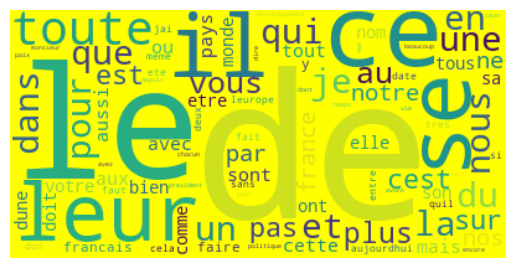

In [12]:
most_freq(X_train,100,"yellow")

['de', 'la', 'et', 'a', 'le', 'les', 'des', 'que', 'qui', 'en']

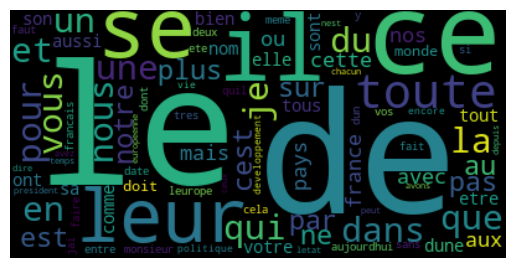

In [13]:
most_freq(X_test,100,"black")

#### 4.3 - Quels sont les 100 mots dont la fréquence documentaire est la plus grande? [word cloud]

In [15]:
import nltk
from nltk.probability import FreqDist
from wordcloud import WordCloud
import pandas as pd

def freq_documentaire (set,nb_word,color):
    words_1 = []
    for line in set:
        for word in line.split():
                words_1.append(word)

    fdist_train = FreqDist(words_1)
    most_freq_set = fdist_train.most_common(nb_word)
    liste_wt = []
    liste_freq = []

    for wt in most_freq_set:
        liste_wt.append(wt[0])
        liste_freq.append(wt[1])

    liste_wt= " ".join(liste_wt)
    nb_word = nb_word - 1 
    print("Le 1er mot dont la fréquence documentaire est la plus élevée est --> ", liste_wt[0],", avec une frequnce documentaire de:", liste_freq[0])
    print("Le 100 ème mot dont la fréquence documentaire est la plus élevée --> ", liste_wt[nb_word],", avec une frequnce documentaire de:", liste_freq[nb_word])
    wordcloud = WordCloud(background_color=color).generate(liste_wt)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") 

Le 1er mot dont la fréquence documentaire est la plus élevée est -->  d , avec une frequnce documentaire de: 48276
Le 100 ème mot dont la fréquence documentaire est la plus élevée -->  t , avec une frequnce documentaire de: 841


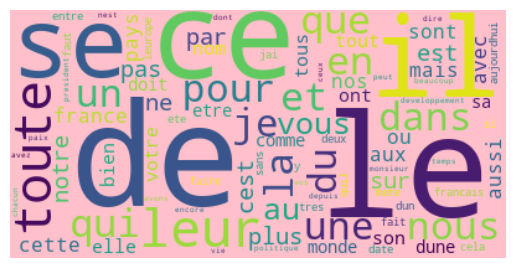

In [16]:
freq_documentaire(X_train,100,"pink")

Le 1er mot dont la fréquence documentaire est la plus élevée est -->  d , avec une frequnce documentaire de: 20709
Le 100 ème mot dont la fréquence documentaire est la plus élevée -->  r , avec une frequnce documentaire de: 370


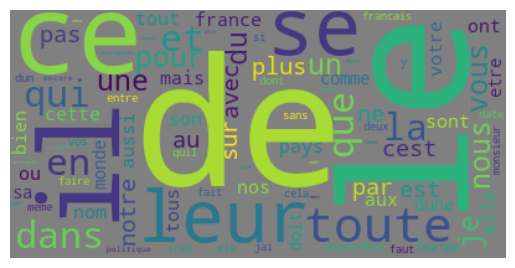

In [17]:
freq_documentaire(X_test,100,"grey")

#### 4.4 - Quels sont les 100 mots les plus discriminants au sens de odds ratio? [word cloud]


In [18]:
def odd_ratio (set,color):
    vectorizer= CountVectorizer()
    X1= vectorizer.fit_transform(X_train)
    df = pd.DataFrame(vectorizer.get_feature_names())

    # add oddratio column
    df['oddratio'] = np.exp(X1.mean(axis=0)).A1

    # sort by oddratio
    df.sort_values('oddratio', inplace=True, ascending=True)

    # get sorted feature names
    sorted_feature_names = df[0].to_list()
    sorted_feature_names =  " ".join(sorted_feature_names)
    wordcloud = WordCloud(background_color=color).generate(sorted_feature_names)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") 

C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


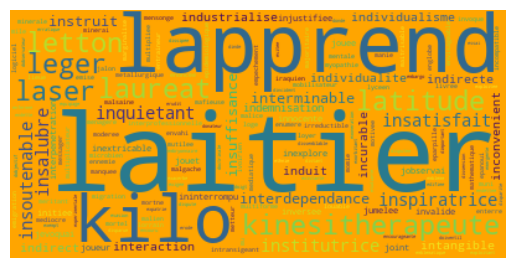

In [19]:
odd_ratio (X_train,"orange")

C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


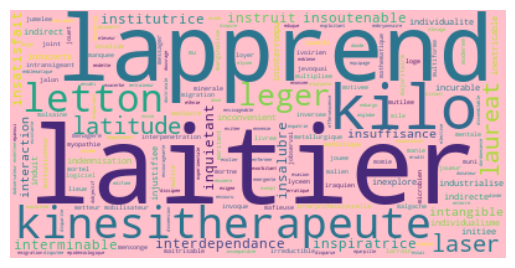

In [20]:
odd_ratio(X_test,"pink")

#### 4.5 - Quelle est la distribution d'apparition des mots (Zipf)


In [29]:
from collections import Counter
def distribution_zipf(set,nb_mot_affichés) : 
    word=[]
    for sentence in set:
        word += sentence.split()
        
    words_counter = Counter(word)  
    word_counter_dict = dict(words_counter)
    sorted(dict(words_counter).items(), key=lambda x: x[1])
    words = list(word_counter_dict.keys())
    counts = list(word_counter_dict.values())
    
    plt.figure(figsize=(40,15))
    plt.plot(words[:nb_mot_affichés], counts[:nb_mot_affichés]) 
    plt.title("Distribution de Zipf") 
    plt.xlabel("Mots") 
    plt.xticks(rotation=90)
    plt.ylabel("Nombres d'occurences")

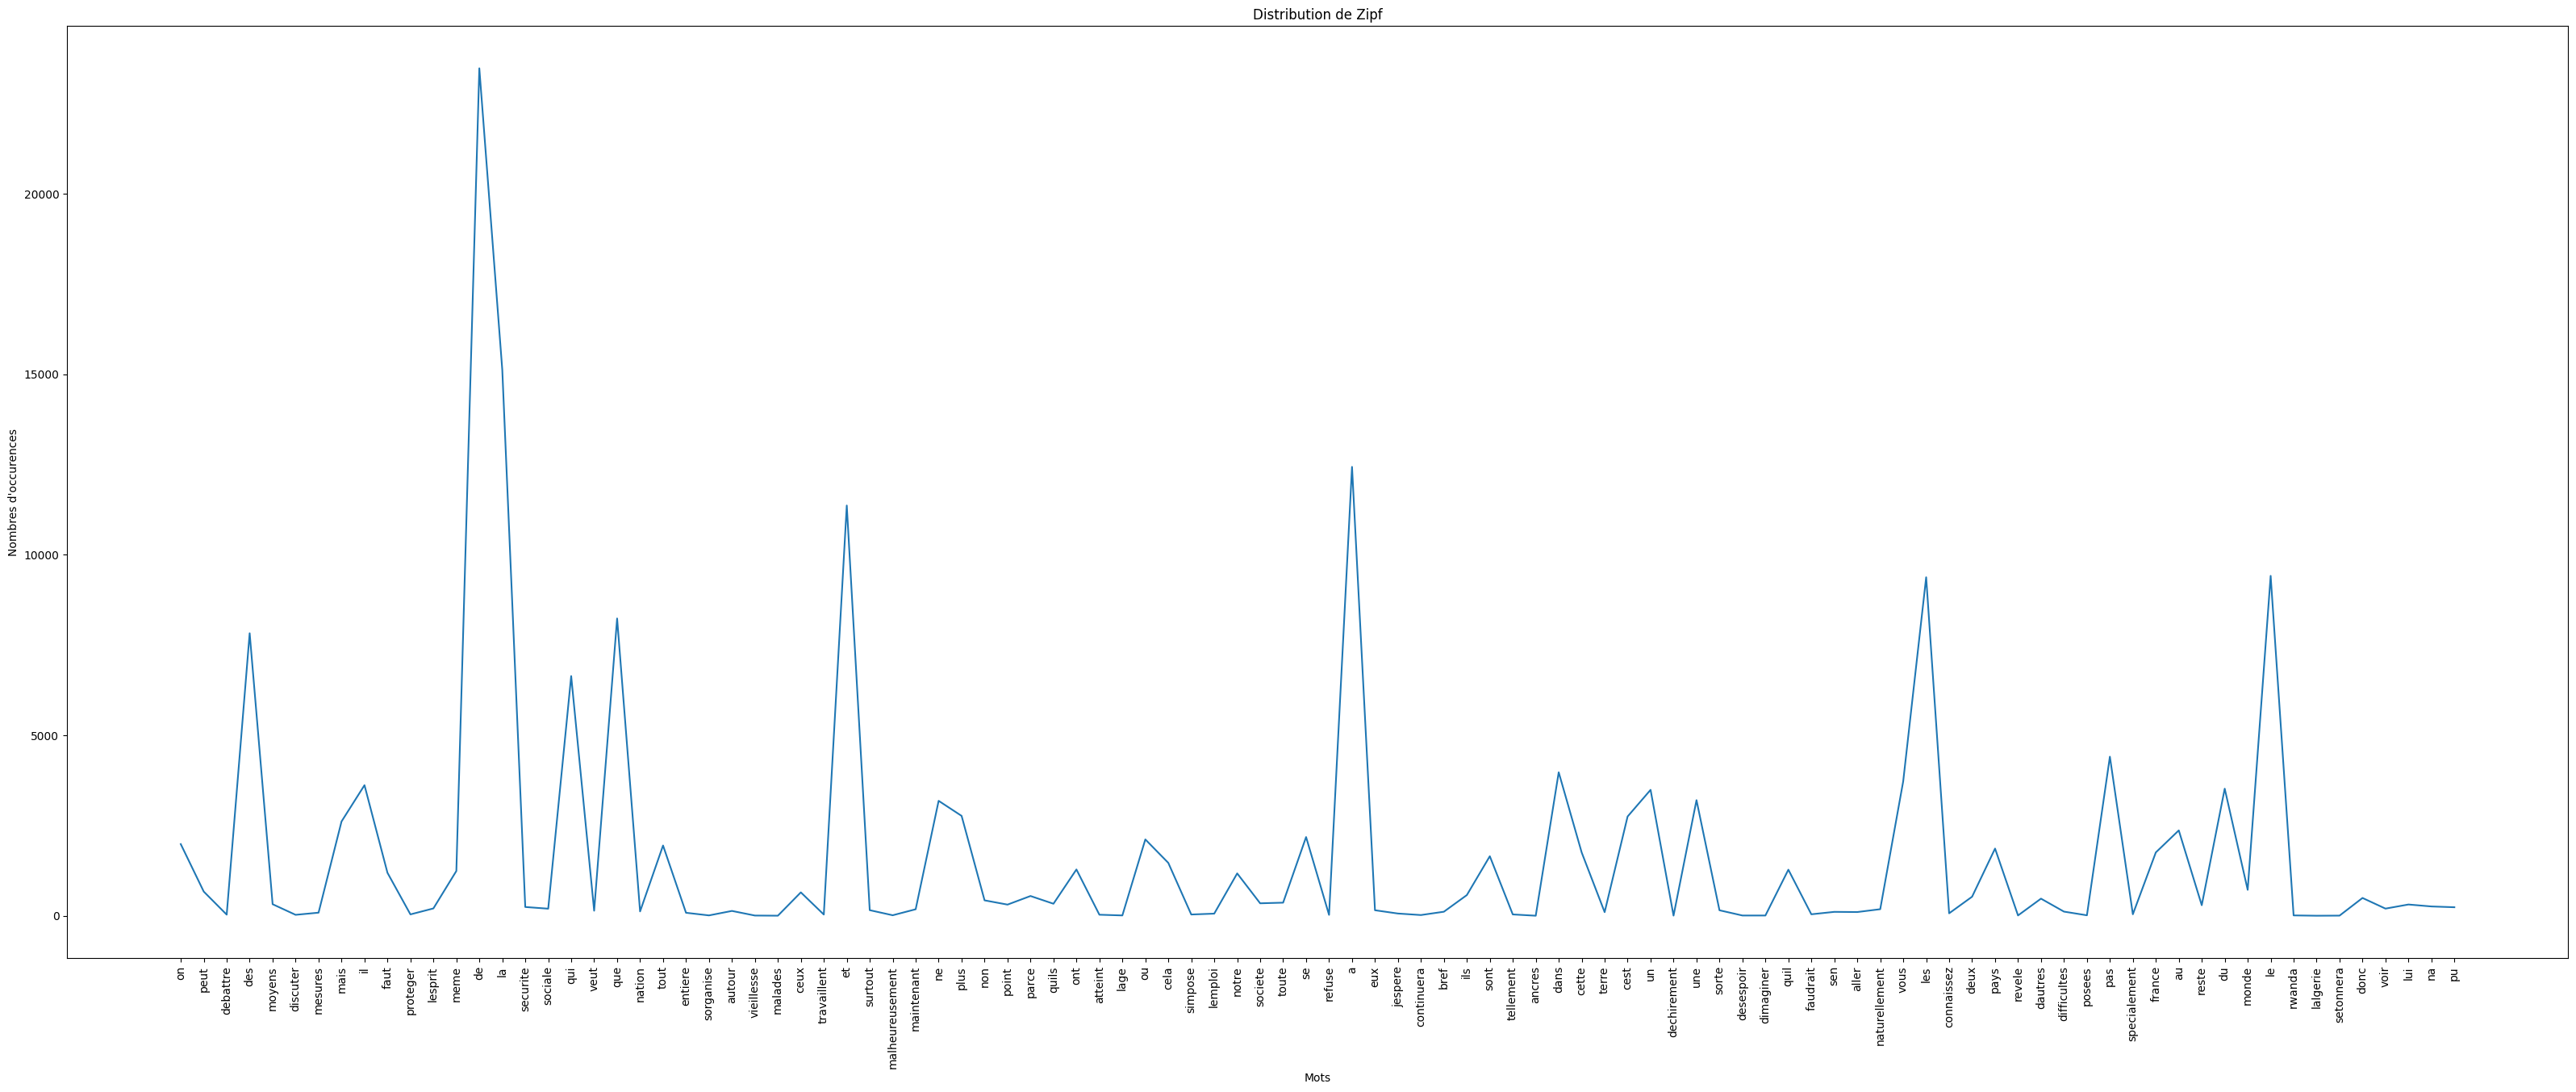

In [30]:
distribution_zipf(X_train,100) 

In [31]:
distribution_zipf(X_test,100) 

AttributeError: split not found

#### 4.6 - Quels sont les 100 bigrammes/trigrammes les plus fréquents?

In [532]:
from nltk import bigrams
import matplotlib.pyplot as plt
''' 
def bigrams(set) :
  X_train_bigrams = []
  most_frequent_bigrams =[]

  for sentence in set:
    X_train_bigrams.extend(list(bigrams(sentence.split())))
  most_frequent_bigrams = Counter(X_train_bigrams).most_common()
      
  liste_word_most_common = [mot for mot, freq in most_frequent_bigrams]
  liste_freq = [freq for mot, freq in most_frequent_bigrams]    
  liste_freq  = liste_freq[:100]
  liste_word_most_common  = liste_word_most_common[:100]

  ngramm = []
  for words in liste_word_most_common:
    ngramm.append(words[0]+'_'+words[1])

  words = ' '.join([str(elem) for elem in ngramm])
  return words
  
bigrams(X_train)
bigrams(X_test)

'''

: 

: 

In [ ]:
from nltk import trigrams
import matplotlib.pyplot as plt
''' 
def trigrams(set) :
  X_train_bigrams = []
  most_frequent_bigrams =[]

  for sentence in set:
    X_train_bigrams.extend(list(trigrams(sentence.split())))
  most_frequent_bigrams = Counter(X_train_bigrams).most_common()
      
  liste_word_most_common = [mot for mot, freq in most_frequent_bigrams]
  liste_freq = [freq for mot, freq in most_frequent_bigrams]    
  liste_freq  = liste_freq[:100]
  liste_word_most_common  = liste_word_most_common[:100]

  ngramm = []
  for words in liste_word_most_common:
    ngramm.append(words[0]+'_'+words[1])

  words = ' '.join([str(elem) for elem in ngramm])
  return words
  
trigrams(X_train)
trigrams(X_test)

'''

### Modèles de Machine Learning
Avant de lancer de grandes expériences, il faut se construire une base de travail solide en étudiant les questions suivantes:

#### Combien de temps ça prend d'apprendre un classifieur NB/SVM/RegLog sur ces données en fonction de la taille du vocabulaire?


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve

word,nb_time, lr_time,svm_time,acc_svm,f1_svm,acc_nb,f1_nb,acc_lr,f1_lr = [],[],[],[],[],[],[],[],[],[]

liste = [100,250,500,750,1000,1500,2000,2500,5000,7500,10000]
for i in liste : 
    for sentence in X_train:
        word += sentence.split()

    dico = Counter(word)  
    liste_word_most_common=[mot for mot,freq in dico.most_common(i)]
    liste_freq= [freq for mot,freq in dico.most_common()]   
    
    vectorizer = CountVectorizer(stop_words = liste_word_most_common)
    X1= vectorizer.fit_transform(X_train)
    dic_size = np.shape(X1.toarray()[1])

    X_test = vectorizer.transform(X_train) 

    ### Naive Bayesien 

    nb_clf =  MultinomialNB()
    start_nb = time.time()
    nb_clf.fit(X1, y_train)
    end_nb = time.time()
    nb_time.append(end_nb - start_nb)

    pred_nb = nb_clf.predict(X_test)    
    acc_nb.append(accuracy_score(y_train, pred_nb))
    f1_nb.append(f1_score(y_train, pred_nb))

    ### SVM 
    svm_clf = LinearSVC()
    start_svm = time.time()
    svm_clf.fit(X1, y_train)
    end_svm = time.time()
    svm_time.append(end_svm - start_svm)
    
    pred_svm = svm_clf.predict(X_test)
    acc_svm.append(accuracy_score(y_train, pred_svm))
    f1_svm.append(f1_score(y_train, pred_svm))

    #### regression logistique 
    log_reg = LogisticRegression()
    start_lr = time.time()
    log_reg.fit(X1, y_train)
    end_lr = time.time()
    lr_time.append(end_lr - start_lr)

    pred_lr = log_reg .predict(X_test)
    acc_lr.append(accuracy_score(y_train, pred_lr))
    f1_lr.append(f1_score(y_train, pred_lr))

    i += 1


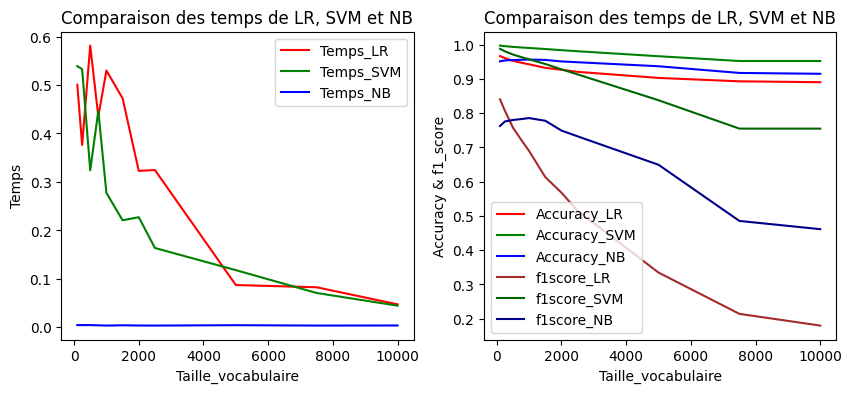

In [56]:
resultats_simple_split_vocSize= pd.DataFrame({'Taille du vocabulaire':liste,'Temps_LR':lr_time,'Accuracy_LR':acc_lr,'f1score_LR':f1_lr,'Temps_SVM':svm_time,'Accuracy_SVM':acc_svm,'f1score_SVM':f1_svm,'Temps_NB':nb_time,'Accuracy_NB':acc_nb,'f1score_NB':f1_nb})

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.plot(liste,lr_time, 'r', label = 'Temps_LR')
plt.plot(liste, svm_time , 'g', label = 'Temps_SVM')
plt.plot(liste, nb_time, 'b', label = 'Temps_NB')
plt.xlabel('Taille_vocabulaire')
plt.ylabel('Temps')
plt.title('Comparaison des temps de LR, SVM et NB')
plt.legend()

plt.subplot(1,2,2)
plt.plot(liste,acc_lr, 'r', label = 'Accuracy_LR')
plt.plot(liste, acc_svm , 'g', label = 'Accuracy_SVM')
plt.plot(liste, acc_nb, 'b', label = 'Accuracy_NB')
plt.plot(liste,f1_lr, 'brown', label = 'f1score_LR')
plt.plot(liste, f1_svm , 'darkgreen', label = 'f1score_SVM')
plt.plot(liste, f1_nb, 'darkblue', label = 'f1score_NB')
plt.xlabel('Taille_vocabulaire')
plt.ylabel('Accuracy & f1_score')
plt.title('Comparaison des temps de LR, SVM et NB')
plt.legend()

plt.show()

La validation croisée est-elle nécessaire? Est ce qu'on obtient les mêmes résultats avec un simple split?

In [241]:
from sklearn.model_selection import KFold
def cross_validation(corpus,label,min,max):
    k_liste,svm_acc,svm_f1,svm_time,nb_acc,nb_f1,nb_time,lr_acc,lr_f1,lr_time= [],[],[],[],[],[],[],[],[],[]

    # Create the KFold object
    for n_split in range(3,4):
        kf = KFold(n_splits=n_split, shuffle=False)

        # Iterate over the splits
        for train_index, test_index in kf.split(corpus):
                # Generate training and validation sets
            X_train_split = [corpus[i] for i in train_index]
            X_test_split = [corpus[i] for i in test_index]
            y_train_split = [label[i] for i in train_index]
            y_test_split =[label[i] for i in test_index]

            print(len(X_train_split),(len(y_train_split)))
            pos= np.where((np.array(y_train_split)!=(1)))
            print(len(pos))
            
                # fitting the model
            vectorizer = CountVectorizer()
            X= vectorizer.fit_transform(X_train_split)

                #X.reshape(1, -1)
            X2= vectorizer.transform(X_train_split)
            X2.reshape(1,-1)

            nb= MultinomialNB()
            start_nb = time.time()
            nb.fit(X,y_train_split)
            end_nb= time.time()
            nb_time.append(end_nb - start_nb)

            svm = LinearSVC()
            start_svm = time.time()
            svm.fit(X,y_train_split)
            end_svm = time.time()
            svm_time.append(end_svm - start_svm)

            
            lr= LogisticRegression()
            start_lr = time.time()
            lr.fit(X,y_train_split)
            end_lr = time.time()
            lr_time.append(end_lr - start_lr)

            # predicting the model on test set
            pred_svm = svm.predict(X2)
            pred_nb= nb.predict(X2)
            pred_lr = lr.predict(X2)
            
            
            # calculating the score
            score_acc = accuracy_score(y_train_split, pred_svm)
            score_f1 = f1_score(y_train_split, pred_svm)
            svm_acc.append(score_acc)
            svm_f1.append(score_f1)

            score_acc = accuracy_score(y_train_split, pred_nb)
            score_f1 = f1_score(y_train_split, pred_nb)
            nb_acc.append(score_acc)
            nb_f1.append(score_f1)
                
            score_acc = accuracy_score(y_train_split, pred_lr)
            score_f1 = f1_score(y_train_split, pred_lr)
            lr_acc.append( score_acc)
            lr_f1.append(score_f1)
            
            n_split += 1 
                
    accuracy_svm=np.array(svm_acc)
    f1_svm= np.array(svm_f1)
    svm_time_np=np.array(svm_time)

    accuracy_nb=np.array(nb_acc)
    f1_nb= np.array(nb_f1)
    nb_time_np=np.array(nb_time)

    accuracy_lr=np.array(lr_acc)
    f1_lr= np.array(lr_f1)
    lr_time_np=np.array(lr_time)

    return lr_time_np,accuracy_lr,f1_lr,svm_time_np,accuracy_svm,f1_svm,nb_time_np,accuracy_nb,f1_nb


In [ ]:
cross_validation(corpus, label, 10 ,20)

In [ ]:
resultats_cross_val_default= pd.DataFrame({'Split':range(10,20),'Temps_LR':lr_time_np.mean(),'Accuracy_LR': accuracy_lr.mean(),'f1score_LR':f1_lr.mean(),
                                            'Temps_SVM':svm_time_np.mean(),'Accuracy_SVM':accuracy_svm.mean(),'f1score_SVM':f1_svm.mean(),
                                            'Temps_NB':nb_time_np.mean(),'Accuracy_NB':accuracy_nb.mean(),'f1score_NB':f1_nb.mean()})
print(resultats_cross_val_default)

<font color=yellow> Comparaison des performances entre une validation croisée et une validation par simple split (plot) : <font>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve

word,nb_time, lr_time,svm_time,acc_svm,f1_svm,acc_nb,f1_nb,acc_lr,f1_lr = [],[],[],[],[],[],[],[],[],[]

for sentence in X_train:
    word += sentence.split()

dico = Counter(word)  
liste_word_most_common=[mot for mot,freq in dico.most_common(i)]
liste_freq= [freq for mot,freq in dico.most_common()]   
    
vectorizer = CountVectorizer(stop_words = liste_word_most_common)
X1= vectorizer.fit_transform(X_train)
    #dic_size = np.shape(X1.toarray()[1])

X_test = vectorizer.transform(X_train) 

    ### Naive Bayesien 

nb_clf =  MultinomialNB()
start_nb = time.time()   
nb_clf.fit(X1, y_train)
end_nb = time.time()
nb_time.append(end_nb - start_nb)

pred_nb = nb_clf.predict(X_test)    
acc_nb.append(accuracy_score(y_train, pred_nb))
f1_nb.append(f1_score(y_train, pred_nb))

    ### SVM 
svm_clf = LinearSVC()
start_svm = time.time()
svm_clf.fit(X1, y_train)
end_svm = time.time()
svm_time.append(end_svm - start_svm)
    
pred_svm = svm_clf.predict(X_test)
acc_svm.append(accuracy_score(y_train, pred_svm))
f1_svm.append(f1_score(y_train, pred_svm))

    #### regression logistique 
log_reg = LogisticRegression()
start_lr = time.time()
log_reg.fit(X1, y_train)
end_lr = time.time()
lr_time.append(end_lr - start_lr)

pred_lr = log_reg .predict(X_test)
acc_lr.append(accuracy_score(y_train, pred_lr))
f1_lr.append(f1_score(y_train, pred_lr))
n_split = 1 

In [ ]:
resultats_simple_split_default= pd.DataFrame({'Split':n_split,'Temps_LR':lr_time,'Accuracy_LR':acc_lr,'f1score_LR':f1_lr,
                                                'Temps_SVM':svm_time,'Accuracy_SVM':acc_svm,'f1score_SVM':f1_svm,
                                                'Temps_NB':nb_time,'Accuracy_NB':acc_nb,'f1score_NB':f1_nb})
print(resultats_simple_split_default)

In [111]:
resultat= pd.concat([resultats_cross_val_default,resultats_simple_split_default])
resultat = resultat.sort_values('Scplit', ascending=True)

In [ ]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.plot(resultat["Split"], resultat["Temps_LR"], 'r', label = 'Temps_LR')
plt.plot(resultat["Split"], resultat["Temps_SVM"] , 'g', label = 'Temps_SVM')
plt.plot(resultat["Split"], resultat["Temps_NB"] ,'b', label = 'Temps_NB')
plt.xlabel('n_split')
plt.ylabel('Temps')
plt.title('Comparaison des temps de LR, SVM et NB')
plt.legend()

plt.subplot(1,2,2)
plt.plot(resultat["Split"], acc_lr, 'r', label = 'Accuracy_LR')
plt.plot(resultat["Split"], acc_svm , 'g', label = 'Accuracy_SVM')
plt.plot(resultat["Split"], acc_nb, 'b', label = 'Accuracy_NB')
plt.plot(resultat["Split"], f1_lr, 'brown', label = 'f1score_LR')
plt.plot(resultat["Split"], f1_svm , 'darkgreen', label = 'f1score_SVM')
plt.plot(resultat["Split"], f1_nb, 'darkblue', label = 'f1score_NB')
plt.xlabel('Taille_vocabulaire')
plt.ylabel('Accuracy & f1_score')
plt.title('Comparaison des temps de LR, SVM et NB')
plt.legend()

plt.show()


La validation croisée est-elle stable? A partir de combien de fold (travailler avec différentes graines aléatoires et faire des statistiques basiques)? 

<font color=yellow> Voire avec le graph précédent  : <font>

### Première campagne d'expériences
Les techniques sur lesquelles nous travaillons étant sujettes au sur-apprentissage: trouver le paramètre de régularisation dans la documentation et optimiser ce paramètre au sens de la métrique qui vous semble la plus appropriée (cf question précédente)

<font color=orange> Les paraèmtres de régulariaation sont testés à deux echelles :: 
- Countvectorizer (paramètres : **min_df,max_df, nrgram_range**)
- Modèles : Naive_Bayesien (paramètre **alpha**), Regression logistique, SVM ): <font>

Naive_Bayesien:
- **alpha** : 0.0001, 0.001, 0.01, 0.1, 1


Regression logistique 
- **C**: 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000
- **penalty**: l1 , l2
- **solver**: liblinear,lbfgs

SVM 
- **C** : 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000

<font>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV

param_grid = {'min_df':[0.001,0.01,0.1,0.2,0.3,0.4,0.5],
              'max_df':[0.7,0.8,0.9,1,5,10,15,20],
              'ngram_range':[(1,1),(1,2),(1,3),(2,2),(2,3),(3,3)]}

vectorizer = CountVectorizer()
grid_search_acc = GridSearchCV(vectorizer, param_grid, cv=3, scoring='accuracy')
grid_search_acc.fit(X_train, y_train)

grid_search_f1 = GridSearchCV(vectorizer, param_grid, cv=3, scoring='f1score')
grid_search_f1.fit(X_train, y_train)

print("Best parameters accuracy: {}".format(grid_search_acc.best_params_))
print("Best parameters f1: {}".format(grid_search_f1.best_params_))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV

param_grid = {'ngram_range':[(1,1),(1,2),(1,3),(2,2),(2,3),(3,3)]}

vectorizer = CountVectorizer()
grid_search = GridSearchCV(vectorizer, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
from sklearn.model_selection import GridSearchCV

### NB parametre alpha 
vectorizer_nb = CountVectorizer()

X_boost_nb = vectorizer_nb.fit_transform(X_train)
params_nb = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}

grid_search
grid_search = GridSearchCV(nb_clf, param_grid=params_nb, scoring='accuracy', n_jobs=3)
grid_search.fit(X_boost_nb, y_train)

best_parameter = grid_search.best_params_['alpha']
print(best_parameter)

from sklearn.model_selection import GridSearchCV
### Logistic regression C + penalty 
vectorizer_lr = CountVectorizer()
X_boost_lr = vectorizer_lr.fit_transform(X_train)
params_lr = {'C':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':('l1','l2')}#,'solver':('liblinear','lbfgs')}

svm_clf = LinearSVC()
grid_search = GridSearchCV(svm_clf, param_grid=params_lr, scoring='accuracy', n_jobs=3)
grid_search.fit(X_boost_lr, y_train)

best_parameter = grid_search.best_params_
print(grid_search.best_params_)

from sklearn.model_selection import GridSearchCV
### SVM  - C 
vectorizer_svm = CountVectorizer()
X_boost_svm = vectorizer_lr.fit_transform(X_train)
params_svm = {'C':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

svm_clf = LinearSVC()
grid_search = GridSearchCV(svm_clf, param_grid=params_svm, scoring='accuracy', n_jobs=3)
grid_search.fit(X_boost_svm, y_train)

best_parameter = grid_search.best_params_
print(grid_search.best_params_)

<font color=orange> A l'issu du gris search , les paramètres les plus optimisés sont : 
- SVM : C = 0.1
- NB : alpha = 1 
- LR :  C = 0.1 ,  penalty = l2 , solver = 
<font> 

### Equilibrage des données
Un problème reconnu comme dur dans la communauté est celui de l'équilibrage des classes (balance en anglais). Que faire si les données sont à 80, 90 ou 99% dans une des classes? Le problème est dur mais fréquent; les solutions sont multiples mais on peut isoler 3 grandes familles de solution.

1. Ré-équilibrer le jeu de données: supprimer des données dans la classe majoritaire et/ou sur-échantilloner la classe minoritaire.
 A vous de jouer pour cette technique

2. Changer la formulation de la fonction de coût pour pénaliser plus les erreurs dans la classe minoritaire:

Les SVM et d'autres approches sklearn possèdent des arguments pour régler B ou 1/B Ces arguments sont utiles mais pas toujours suffisant. 1. Courbe ROC et modification du biais. Une fois la fonction 
 apprise, il est possible de la *bidouiller* a posteriori: si toutes les prédictions 
 sont dans une classe, on va introduire  dans 
 et le faire varier jusqu'à ce qu'un des points change de classe. On peut ensuite aller de plus en plus loin. Le calcul de l'ensemble des scores associés à cette approche mène directement à la courbe ROC.
 
Note: certains classifieurs sont intrinsèquement plus résistante au problème d'équilibrage, c'est par exemple le cas des techniques de gradient boosting. 

### <font color=orange> ENTRAINEMENT SUR DONNEES RE-EQUILIBREES </font>

<font color=orange> Re-importation du Dataset </font>

In [221]:
path_train= r"C:\Users\actou\OneDrive\Documents\IODAA\ONTO-TAL\TAL\tuto_TAL-main\notebooks\ressources\AFDpresidentutf8\corpus.tache1.learn.utf8"
trainalltxts,trainalllabs = load_pres(path_train)

path_test= r"C:\Users\actou\OneDrive\Documents\IODAA\ONTO-TAL\TAL\tuto_TAL-main\notebooks\ressources\AFDpresidentutf8\corpus.tache1.test.utf8"
testalltxts,testalllabs = load_pres(path_test)

### Validation par simple split : 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainalltxts, trainalllabs, test_size=0.3, random_state=0) 

<font color=orange> Requilibrage du dataset </font>

In [222]:
def balanced_dataset (X_train,y_train) : 
    import random as rd
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import rc
    import pandas as pd

    index_etiquettes_neg = np.where((np.array(y_train)!=(1)))
    X_train_neg, y_train_neg, = X_train.copy(), y_train.copy()
    for i in sorted(index_etiquettes_neg[0],reverse = True):
        del (y_train_neg [i],X_train_neg[i])

    index_etiquettes_pos = np.where((np.array(y_train)==1))
    X_train_pos,y_train_pos= X_train.copy(),y_train.copy()
    for i in sorted(index_etiquettes_pos[0],reverse = True):
        del (y_train_pos [i],(X_train_pos [i]))

    liste_l,liste_j,len_neg,len_pos = [],[],[],[]

    for j in [2,3,4,5]:
        X_train_balanced_neg,y_train_balanced_neg = X_train_neg,y_train_neg 
        list_pos= [k for k in range(len(X_train_neg))]
        for i in sorted(rd.sample(list_pos,int(len(X_train_neg)/2)), reverse=True):
            del (X_train_balanced_neg[i],y_train_balanced_neg[i])

        X_new_train,y_new_train = (j*X_train_pos + X_train_balanced_neg),(j*y_train_pos + y_train_balanced_neg)
        liste_j.append(j)
        len_neg.append(sum(np.array(y_new_train)==1)/len(y_new_train)*100)
        len_pos.append(sum(np.array(y_new_train)!=1)/len(y_new_train)*100)
        j +=1
        
    ### GRAPHIQUES 
    bars = np.add(len_neg, len_pos).tolist()
    r = [2,3,4,5]
    barWidth = 1
    plt.figure(figsize=(5,3))
    plt.bar(r, len_neg, color='red', edgecolor='white', width=barWidth)
    plt.bar(r, len_pos, bottom=len_neg, color='blue', edgecolor='white', width=barWidth)

    # Custom X axis
    plt.xticks(r, fontweight='bold')
    plt.xlabel("facteur")
    plt.ylabel("proportion d'etiquettes")
    plt.title("Quel facteur pour l'oversampling")
    plt.legend(labels=['Negatif', 'Positif'])
    plt.show()

    return X_new_train,y_new_train,X_train_pos,X_train_balanced_neg,y_train_pos,y_train_balanced_neg

<font color=orange> On travaille avec les datasets réquilibrés : X_train_balanced et X_test_balanced </font>

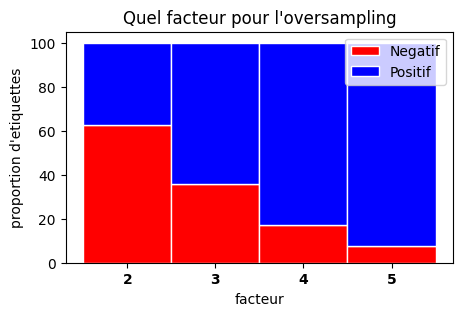

In [223]:
balanced_dataset (X_train,y_train)
j = 3
X_train_balanced ,y_train_balanced  = (X_train_pos + j*X_train_balanced_neg),(y_train_pos + j*y_train_balanced_neg)

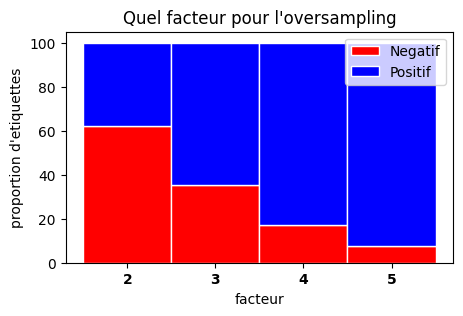

In [74]:
balanced_dataset (X_test,y_test) 
X_test_balanced, y_test_balanced= (X_train_pos + j*X_train_balanced_neg), (y_train_pos + j*y_train_balanced_neg)

<font color=orange>  Pour compenser le léger déquilibre et favaoriser l'optimisation des paramètres et hyperparamètres des moèdeles, on switch les etiquettes -1 et 1  </font>

In [75]:
def reverse_label(y_train_balanced) :
    y_train_new, liste_n,liste_o = [] ,[],[]

    for i in y_train_balanced: 
            if i == 1 :
                y_train_new.append(-1)
            else : 
                y_train_new.append(1)

    for i in y_train_new : 
            if i == 1 : 
                liste_n.append(i)  

    for i in y_train_balanced: 
            if i == 1 : 
                liste_o.append(i)  
                
    print("OLD SET") 
    print("La proportion d'etiquettes 1 est de:", (len(liste_o)/(len(y_train_balanced))*100),"%") 
    print("La proportion d'etiquettes -1 est de:", (100-(len(liste_o)/(len(y_train_balanced))*100)),"%")

    print("NEW SET") 
    print("La proportion d'etiquettes 1 est de:", (len(liste_n)/(len(y_train_new))*100),"%") 
    print("La proportion d'etiquettes -1 est de:", (100-(len(liste_n)/(len(y_train_new))*100)),"%")

    
    return y_train_new

In [ ]:
reverse_label(y_train_balanced)

In [ ]:
reverse_label(y_test_balanced)

<font color=orange> Pre-traitement de X_train_balanced et X_test_balanced  </font>

In [78]:
X_train_balanced = [pretraitement(i) for i in X_train_balanced]
X_test_balanced = [pretraitement(i) for i in X_test_balanced]

<font color=orange> Entrainement des modèles SVM ,LR et NB avec paramètres et hyperparamètres optimisés par gridsearch </font>

In [171]:
from collections import Counter
def stop_word(set,nombre):
    word=[]
    for sentence in set:
            word += sentence.split()
    
    dico = Counter(word)       
    liste_most_common=[mot for mot,freq in dico.most_common(nombre)]
    
    return liste_most_common

liste_100 =stop_word(X_train_balanced,100)
liste_500 = stop_word(X_train_balanced,500)
liste_750 = stop_word(X_train_balanced,750)
liste_1000 = stop_word(X_train_balanced,1000)
liste_1500 = stop_word(X_train_balanced,1500)
liste_2000 = stop_word(X_train_balanced,2000)
liste_3000 = stop_word(X_train_balanced,3000)
liste_5000 = stop_word(X_train_balanced,5000)
liste_7500 = stop_word(X_train_balanced,7500)

[(14748,), (14348,), (14099,), (13849,), (13349,), (12849,), (11849,), (9852,), (7353,)]


Text(0, 0.5, 'dic_size')

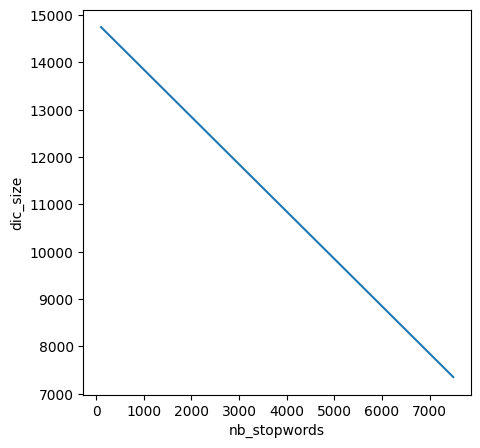

In [181]:
liste_dic_size =[]

liste = [100,500,750,1000,1500,2000,3000,5000,7500]
for i in [liste_100,liste_500,liste_750,liste_1000,liste_1500,liste_2000,liste_3000,liste_5000,liste_7500] : 
    vectorizer_1= CountVectorizer(stop_words=i)
    X1= vectorizer_1.fit_transform(X_train_balanced)
    dic_size = np.shape(X1.toarray()[1])
    liste_dic_size.append(dic_size)

print(liste_dic_size)
plt.figure(figsize = (5,5))
plt.plot(liste,liste_dic_size)
plt.xlabel('nb_stopwords') 
plt.ylabel('dic_size')

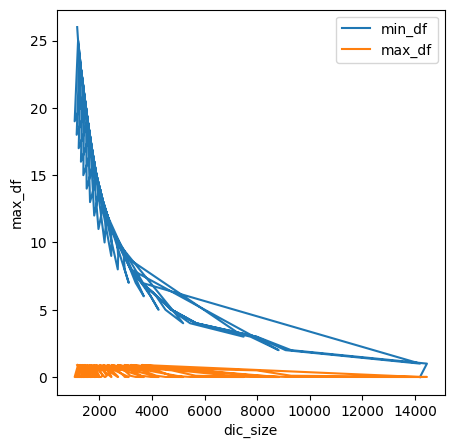

In [198]:
from sklearn.feature_extraction.text import CountVectorizer
liste_min,liste_max,list_disize_min_max=[],[],[]
min_liste = [0.005, 0.01, 0.1, 0.5, 0.6, 0.7, 0.8, 0.9]
for min in range(20):
    for max in min_liste:
        vectorizer  = CountVectorizer(max_df=max, min_df =min)
        X= vectorizer.fit_transform(X_train_balanced)
        dic_size = np.shape(X.toarray()[1])
        liste_min.append(min)
        liste_max.append(max)
        list_disize_min_max.append(dic_size)
        min +=1
        max +=1

list_disize_min_max= np.array(list_disize_min_max)
plt.figure(figsize = (5,5))
plt.plot(list_disize_min_max,liste_min, label = "min_df")
plt.xlabel('dic_size') 
plt.ylabel('min_df')
plt.subplot()
plt.plot(list_disize_min_max,liste_max,label = "max_df" )
plt.xlabel('dic_size') 
plt.ylabel('max_df')
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (3, 1) and (6,)

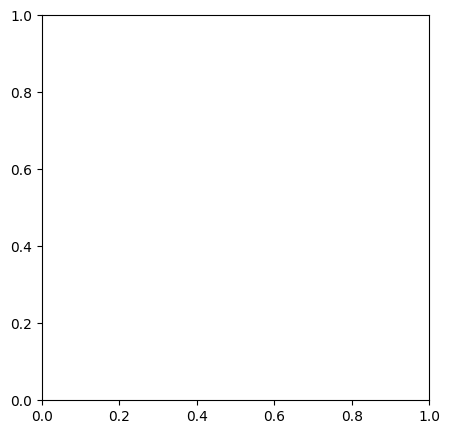

In [79]:
liste_ngram, liste_dicsize_ngram= [],[]
for i in [(1,1),(1,2),(1,3)] :#(2,2),(2,3),(3,3)]: 
        vectorizer_2  = CountVectorizer(ngram_range = i )
        X2= vectorizer_2.fit_transform(X_train_balanced)
        dic_size = np.shape(X2.toarray()[1])
        liste_ngram.append(i)
        liste_dicsize_ngram.append(dic_size)
        

liste_dicsize_ngram = np.array(liste_dicsize_ngram)       
plt.figure(figsize = (5,5))
plt.plot(liste_dicsize_ngram,range(1,7), label = "ngram")
plt.xlabel('dic_size') 
plt.ylabel('ngram')
plt.subplot()

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

nb_clf = MultinomialNB()
lr_dicsize_clf = LogisticRegression(random_state=0, solver='lbfgs',n_jobs=(-1),class_weight = 'balanced')
lr_dicsize_clf_lib = LogisticRegression(random_state=0, solver='liblinear',n_jobs= (-1),class_weight = 'balanced')
svm_dicsize_clf = LinearSVC(random_state=0, tol=1e-5, max_iter=10000)

list_maxdf, list_mindf=[],[]

list_dicsize=[]   
list_nb_perf_acc, list_nb_perf_f1=[],[]
list_lr_perf_acc, list_lr_perf_f1=[],[]
list_lr_perf_lib_acc, list_lr_perf_f1_lib=[],[]
list_svm_perf_acc, list_svm_perf_f1=[],[]

## A ajouter : start_nb = time.time()   word,nb_time, lr_time,svm_time nb_time.append(end_nb - start_nb)
max_df = [0.005, 0.01, 0.1, 0.5, 0.6, 0.7, 0.8, 0.9]
for min in range(20):
    for max in max_df: 
        list_mindf.append(min)
        list_maxdf.append(max)
        vectorizer  = CountVectorizer(max_df=max, min_df =min)
        X = vectorizer.fit_transform(X_train_balanced)
        
        dic_size = np.shape(X.toarray()[1])
        list_dicsize.append(dic_size) 

        X_test= vectorizer.transform(X_test_balanced)

        ### NB
        nb_clf.fit(X, y_train_balanced)
        yhat_nb = nb_clf.predict(X_test)
        list_nb_perf_acc.append(accuracy_score(y_test_balanced, yhat_nb))
        list_nb_perf_f1.append(f1_score(y_test_balanced, yhat_nb))
  
        ### Losgitic regression with lbfgs
        lr_dicsize_clf.fit(X, y_train_balanced)
        yhat_nb = lr_dicsize_clf.predict(X_test)
        list_lr_perf_acc.append(accuracy_score(y_test_balanced, yhat_nb))
        list_lr_perf_f1.append(f1_score(y_test_balanced, yhat_nb))
        
        ### Losgitic regression with liblinear
        lr_dicsize_clf_lib.fit(X, y_train_balanced)
        yhat_nb = lr_dicsize_clf_lib.predict(X_test)
        list_lr_perf_lib_acc.append(accuracy_score(y_test_balanced, yhat_nb))
        list_lr_perf_f1_lib.append(f1_score(y_test_balanced, yhat_nb))
    
        ### SVM 
        svm_dicsize_clf.fit(X, y_train_balanced)
        yhat_nb = lr_dicsize_clf_lib.predict(X_test)
        list_svm_perf_acc.append(accuracy_score(y_test_balanced, yhat_nb))
        list_svm_perf_f1.append(f1_score(y_test_balanced, yhat_nb))
     
        print("  ----------- OK------------" )
        min +=1
        max +=1

C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


  ----------- OK------------


<font color=orange> testons l'influence du pramètre **ngram_range** sur les performances </font>

In [82]:
from matplotlib import pyplot as plt

li = list_maxdf, list_mindf, list_dicsize,list_nb_perf_acc,list_nb_perf_f1,list_lr_perf_acc,list_lr_perf_f1,list_lr_perf_acc,list_lr_perf_f1,list_lr_perf_lib_acc,list_lr_perf_f1_lib,list_svm_perf_acc,list_svm_perf_f1
for k in li:
    k=np.array(k)

resultat_NB = pd.DataFrame({"taille dictionnnaire":list_dicsize,"max_df":list_maxdf,"min_df":list_mindf,
                        "NB Accuracy":list_nb_perf_acc,"NB f1score":list_nb_perf_f1})
resultat_NB = resultat_NB.sort_values('NB f1score', ascending=False)
print(resultat_NB[:10])

   taille dictionnnaire  max_df  min_df  NB Accuracy  NB f1score
0              (14186,)   0.005       0     0.924987    0.934633
8              (14186,)   0.005       1     0.924987    0.934633
1              (14451,)   0.010       1     0.925665    0.934371
9               (9126,)   0.010       2     0.914477    0.924015
2               (9344,)   0.100       2     0.915155    0.923780
16              (8861,)   0.005       2     0.910070    0.921332
10              (7999,)   0.100       3     0.907103    0.915964
3               (8024,)   0.500       3     0.905577    0.914229
17              (7781,)   0.010       3     0.902017    0.912610
24              (7516,)   0.005       3     0.894050    0.906925


In [83]:
resultat_SVM = pd.DataFrame({"taille dictionnnaire":list_dicsize,"max_df":list_maxdf,"min_df":list_mindf,"Accuracy ":list_svm_perf_acc, "f1 score":list_svm_perf_f1})
resultat_SVM = resultat_SVM.sort_values('f1 score', ascending=False)
print(resultat_SVM[:10])

   taille dictionnnaire  max_df  min_df  Accuracy   f1 score
1              (14451,)   0.010       1   0.974741  0.977441
2               (9344,)   0.100       2   0.972199  0.975182
3               (8024,)   0.500       3   0.969825  0.973120
10              (7999,)   0.100       3   0.969063  0.972422
9               (9126,)   0.010       2   0.966520  0.969992
0              (14186,)   0.005       0   0.965079  0.968337
8              (14186,)   0.005       1   0.965079  0.968337
17              (7781,)   0.010       3   0.962197  0.966109
11              (5708,)   0.500       4   0.957366  0.962098
4               (5708,)   0.600       4   0.957366  0.962098


In [84]:
resultat_LR = pd.DataFrame({"taille dictionnnaire":list_dicsize,"max_df":list_maxdf,"min_df":list_mindf, "Accuracy":list_lr_perf_acc, "f1_score":list_lr_perf_f1})
resultat_LR_lib = pd.DataFrame({"taille dictionnnaire":list_dicsize,"max_df":list_maxdf,"min_df":list_mindf,"Accuracy ":list_lr_perf_lib_acc, "f1_score": list_lr_perf_f1_lib})

resultat_LR= resultat_LR.sort_values('f1_score', ascending=False)
resultat_LR_lib= resultat_LR_lib.sort_values('f1_score', ascending=False)

print(resultat_LR[:10])

   taille dictionnnaire  max_df  min_df  Accuracy  f1_score
1              (14451,)   0.010       1  0.974741  0.977441
2               (9344,)   0.100       2  0.972199  0.975182
3               (8024,)   0.500       3  0.969486  0.972826
10              (7999,)   0.100       3  0.969063  0.972422
9               (9126,)   0.010       2  0.966520  0.969992
8              (14186,)   0.005       1  0.965079  0.968337
0              (14186,)   0.005       0  0.965079  0.968337
17              (7781,)   0.010       3  0.962197  0.966109
16              (8861,)   0.005       2  0.958128  0.962047
11              (5708,)   0.500       4  0.957196  0.961953


In [85]:
print(resultat_LR_lib[:10])

   taille dictionnnaire  max_df  min_df  Accuracy   f1_score
1              (14451,)   0.010       1   0.974741  0.977441
2               (9344,)   0.100       2   0.972199  0.975182
3               (8024,)   0.500       3   0.969825  0.973120
10              (7999,)   0.100       3   0.969063  0.972422
9               (9126,)   0.010       2   0.966520  0.969992
0              (14186,)   0.005       0   0.965079  0.968337
8              (14186,)   0.005       1   0.965079  0.968337
17              (7781,)   0.010       3   0.962197  0.966109
11              (5708,)   0.500       4   0.957366  0.962098
4               (5708,)   0.600       4   0.957366  0.962098


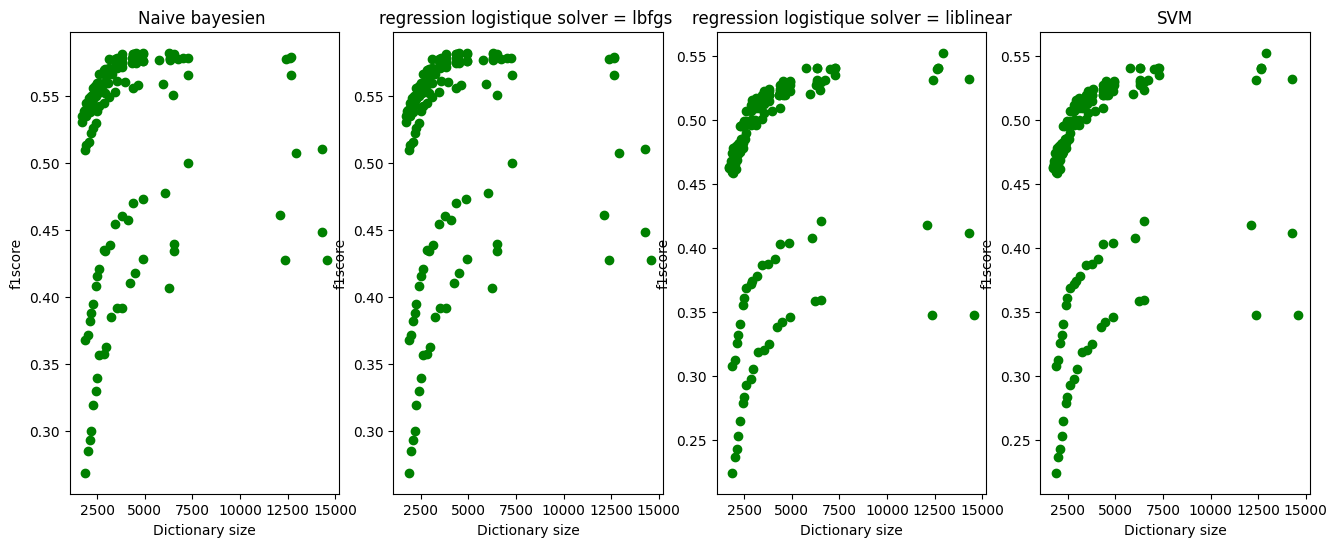

In [302]:
plt.figure(figsize=(16, 6))
list_dicsize.sort(reverse = True)

##### NAIVE BAYESIEN 
plt.subplot(1,4,1)
plt.title("Naive bayesien ")
plt.ylabel('f1score') 
plt.xlabel('Dictionary size')
plt.plot(list_dicsize, list_nb_perf_f1, 'go', label="NB f1 - pos class")

##### REGRESSION LOGISTIQUE 
plt.subplot(1,4,2)
plt.title("regression logistique solver = lbfgs ")
plt.ylabel('f1score') 
plt.xlabel('Dictionary size')
plt.plot(list_dicsize, list_nb_perf_f1,'go', label="NB f1 - pos class")

plt.subplot(1,4,3)
plt.title("regression logistique solver = liblinear")
plt.ylabel('f1score') 
plt.xlabel('Dictionary size')
plt.plot(list_dicsize, list_lr_perf_f1_lib, 'go',label="NB f1 - pos class")

##### SVM
plt.subplot(1,4,4)
plt.title("SVM")
plt.ylabel('f1score') 
plt.xlabel('Dictionary size')
plt.plot(list_dicsize, list_svm_perf_f1,'go', label="NB f1 - pos class")

<font color=orange> Graphiques de performances des models de classificatrion selon les paramètres de Countvectorizer <font> 

In [ ]:
nb_clf = MultinomialNB()
lr_dicsize_clf = LogisticRegression(random_state=0, solver='lbfgs',n_jobs=(-1),class_weight = 'balanced')
lr_dicsize_clf_lib = LogisticRegression(random_state=0, solver='liblinear',n_jobs= (-1),class_weight = 'balanced')
svm_dicsize_clf = LinearSVC(random_state=0, tol=1e-5, max_iter=10000)

list_ngram,list_dicsize_nb,list_dicsize = [] ,[],[]
list_nb_perf_acc, list_nb_perf_f1=[],[]
list_lr_perf_acc, list_lr_perf_f1=[],[]
list_lr_perf_lib_acc, list_lr_perf_f1_lib=[],[]
list_svm_perf_acc, list_svm_perf_f1=[],[]

for n in [(1,1),(1,2),(1,3),(2,2),(2,3),(3,3)]:
        list_ngram.append(n)
        vectorizer  = CountVectorizer(min_df = 9,max_df = 0.8, ngram_range=n)
        X = vectorizer.fit_transform(X_train_balanced)
        dic_size_nb = np.shape(X.toarray()[1])
        list_dicsize_nb.append(dic_size_nb) 
        X_test= vectorizer.transform(X_test_balanced)

        ### NB
        nb_clf.fit(X, y_train_balanced)
        yhat_nb = nb_clf.predict(X_test)
        list_nb_perf_acc.append(accuracy_score(y_test_balanced, yhat_nb))
        list_nb_perf_f1.append(f1_score(y_test_balanced, yhat_nb))

        #########################################################
        vectorizer  = CountVectorizer(min_df = 3,max_df = 0.5, ngram_range=n)
        X = vectorizer.fit_transform(X_train_balanced)
        dic_size = np.shape(X.toarray()[1])
        list_dicsize.append(dic_size) 
        X_test= vectorizer.transform(X_test_balanced)

        ### Losgitic regression with lbfgs
        lr_dicsize_clf.fit(X, y_train_balanced)
        yhat_nb = lr_dicsize_clf.predict(X_test)
        list_lr_perf_acc.append(accuracy_score(y_test_balanced, yhat_nb))
        list_lr_perf_f1.append(f1_score(y_test_balanced, yhat_nb))
                
        ### Losgitic regression with liblinear
        lr_dicsize_clf_lib.fit(X, y_train_balanced)
        yhat_nb = lr_dicsize_clf_lib.predict(X_test)
        list_lr_perf_lib_acc.append(accuracy_score(y_test_balanced, yhat_nb))
        list_lr_perf_f1_lib.append(f1_score(y_test_balanced, yhat_nb))
        
        ### SVM 
        svm_dicsize_clf.fit(X, y_train_balanced)
        yhat_nb = lr_dicsize_clf_lib.predict(X_test)
        list_svm_perf_acc.append(accuracy_score(y_test_balanced, yhat_nb))
        list_svm_perf_f1.append(f1_score(y_test_balanced, yhat_nb))
        
print("  ----------- OK------------" )

In [ ]:
from matplotlib import pyplot as plt

li = list_maxdf, list_ngram, list_dicsize_nb,list_nb_perf_acc,list_nb_perf_f1,list_lr_perf_acc,list_lr_perf_f1,list_lr_perf_acc,list_lr_perf_f1,list_lr_perf_lib_acc,list_lr_perf_f1_lib,list_svm_perf_acc,list_svm_perf_f1
for k in li:
    k=np.array(k)

pd.DataFrame({"taille dictionnnaire":list_dicsize_nb,"ngram":list_ngram,"NB Accuracy":list_nb_perf_acc,"NB f1score":list_nb_perf_f1})
#resultat_NB = resultat_NB.sort_values('NB f1score', ascending=False)

In [356]:
resultat_SVM = pd.DataFrame({"taille dictionnnaire":list_dicsize,"ngram":list_ngram,"Accuracy ":list_svm_perf_acc, "f1 score":list_svm_perf_f1})
print(resultat_SVM.sort_values('f1 score', ascending=False))

  taille dictionnnaire   ngram  Accuracy   f1 score
2            (184308,)  (1, 3)   0.688390  0.688408
1             (79166,)  (1, 2)   0.657154  0.636690
4            (171638,)  (2, 3)   0.632981  0.611617
0             (12670,)  (1, 1)   0.609956  0.552533
3             (66496,)  (2, 2)   0.582395  0.514583
5            (105142,)  (3, 3)   0.524460  0.406819


In [358]:
resultat_LR = pd.DataFrame({"taille dictionnnaire":list_dicsize,"ngram":list_ngram, "Accuracy":list_lr_perf_acc, "f1_score":list_lr_perf_f1})
print(resultat_LR.sort_values('f1_score', ascending=False))

  taille dictionnnaire   ngram  Accuracy  f1_score
2            (184308,)  (1, 3)  0.688275  0.688257
1             (79166,)  (1, 2)  0.657040  0.636524
4            (171638,)  (2, 3)  0.632637  0.611111
0             (12670,)  (1, 1)  0.609382  0.551756
3             (66496,)  (2, 2)  0.582453  0.514488
5            (105142,)  (3, 3)  0.524403  0.406704


In [359]:

resultat_LR_lib = pd.DataFrame({"taille dictionnnaire":list_dicsize,"ngram":list_ngram,"Accuracy ":list_lr_perf_lib_acc, "f1_score": list_lr_perf_f1_lib})
print(resultat_LR_lib.sort_values('f1_score', ascending=False))


  taille dictionnnaire   ngram  Accuracy   f1_score
2            (184308,)  (1, 3)   0.688390  0.688408
1             (79166,)  (1, 2)   0.657154  0.636690
4            (171638,)  (2, 3)   0.632981  0.611617
0             (12670,)  (1, 1)   0.609956  0.552533
3             (66496,)  (2, 2)   0.582395  0.514583
5            (105142,)  (3, 3)   0.524460  0.406819


<font color=orange> Grid search pour optimiser les hyperparamètres des modèles <font>

In [112]:
### NB 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

vectorizer = CountVectorizer(max_df = 0.05, min_df = 1, ngram_range=(1,3))        
X_boost_nb = vectorizer.fit_transform(X_train_balanced)
X_test= vectorizer.transform(X_test_balanced)
params_nb = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
liste_cv,liste_f1,liste_alpha = [],[],[]
for i in range(2,15) :
    nb_clf = MultinomialNB()
    #nb_clf = MultinomialNB
    grid_search = GridSearchCV(nb_clf, param_grid=params_nb, scoring='f1', n_jobs=3 , cv = i)
    grid_search.fit(X_boost_nb, y_train_balanced)

    grid_search.best_estimator_.score(X_boost_nb,y_train_balanced)
    pred=grid_search.predict(X_test)
    liste_f1.append(f1_score(y_test_balanced,pred))
    liste_cv.append(i)
    liste_alpha.append(grid_search.best_params_['alpha'])
    i += 1

pd.DataFrame({"CV":liste_cv,"best_alpha":liste_alpha,"f1_score":liste_f1})[:3]


,CV,best_alpha,f1_score
0,2,0.0001,0.999008
1,3,0.0001,0.999008
2,4,0.0001,0.999008


In [116]:
pred=grid_search.predict(X_test)
parameters_NB = grid_search.best_params_
vectorizer_NB = CountVectorizer(max_df = 0.05, min_df = 1, ngram_range=(1,3))        

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      5243
           1       1.00      1.00      1.00      6555

    accuracy                           1.00     11798
   macro avg       1.00      1.00      1.00     11798
weighted avg       1.00      1.00      1.00     11798



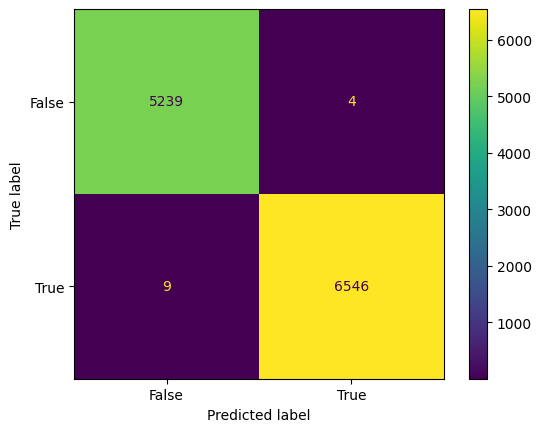

In [88]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
print(classification_report(y_test_balanced,pred))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test_balanced,pred), display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
### Logistic regression 
vectorizer_LR= CountVectorizer(min_df = 1, max_df = 0.10,ngram_range=(1,3))
X_boost= vectorizer_LR.fit_transform(X_train_balanced)
X_test= vectorizer_LR.transform(X_test_balanced)
params = {'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':('l1','l2')}#,'solver':('liblinear','lbfgs')}

modele = LogisticRegression(random_state=0, solver='lbfgs',n_jobs=-1)
grid_search = GridSearchCV(modele, param_grid=params_lr, scoring='f1', n_jobs=3)
grid_search.fit(X_boost, y_train_balanced)
pred=grid_search.predict(X_test)
parameters_LR = grid_search.best_params_

### Effet de l ataille de la liste des stopwords 
### meilleures performances sans les intégrers aux paramètres 

Les meilleurs paramètres de LR  sont : {'C': 1000, 'penalty': 'l2'}
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      5243
           1       1.00      1.00      1.00      6555

    accuracy                           1.00     11798
   macro avg       1.00      1.00      1.00     11798
weighted avg       1.00      1.00      1.00     11798



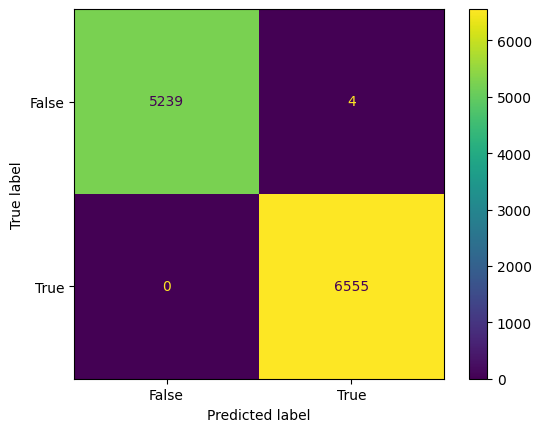

In [111]:
print("Les meilleurs paramètres de LR  sont :",parameters_LR)
print(classification_report(y_test_balanced,pred))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test_balanced,pred), display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
### Regression logistque with liblinear

vectorizer = CountVectorizer(min_df = 3, max_df = 0.5,ngram_range=(1,3))
X_boost= vectorizer.fit_transform(X_train_balanced)
X_test= vectorizer.transform(X_test_balanced)
params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':('l1','l2')}

modele = LogisticRegression(random_state=0, solver='liblinear',n_jobs= (-1))
grid_search = GridSearchCV(modele, param_grid=params, scoring='f1', n_jobs=3)
grid_search.fit(X_boost, y_train_balanced)
pred=grid_search.predict(X_test)
parameters_LRlib = grid_search.best_estimator_

Les meilleurs paramètres de LR(liblinear) sont : LogisticRegression(C=10, n_jobs=-1, random_state=0, solver='liblinear')
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      5243
           1       1.00      1.00      1.00      6555

    accuracy                           1.00     11798
   macro avg       1.00      1.00      1.00     11798
weighted avg       1.00      1.00      1.00     11798



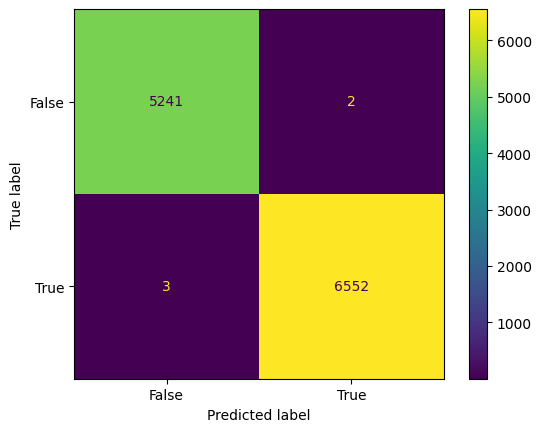

In [ ]:
print("Les meilleurs paramètres de LR(liblinear) sont :" ,parameters_LRlib)
print(classification_report(y_test_balanced,pred))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test_balanced,pred), display_labels = [False, True])
cm_display.plot()
plt.show()

In [107]:
from sklearn.model_selection import GridSearchCV

### SVM  
vectorizer = CountVectorizer(min_df = 1, max_df = 0.01,ngram_range=(1,3))
X_boost= vectorizer.fit_transform(X_train_balanced)
X_test= vectorizer.transform(X_test_balanced)
params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

modele = LinearSVC(random_state=0, tol=1e-5)

grid_search = GridSearchCV(modele, param_grid=params, scoring='f1', n_jobs=-1)
grid_search.fit(X_boost, y_train_balanced)
pred=grid_search.predict(X_test)
parameters_SVM = grid_search.best_estimator_


Le meilleur paramètre de SVM est  -->  LinearSVC(C=0.1, random_state=0, tol=1e-05)
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      5243
           1       1.00      1.00      1.00      6555

    accuracy                           1.00     11798
   macro avg       1.00      1.00      1.00     11798
weighted avg       1.00      1.00      1.00     11798



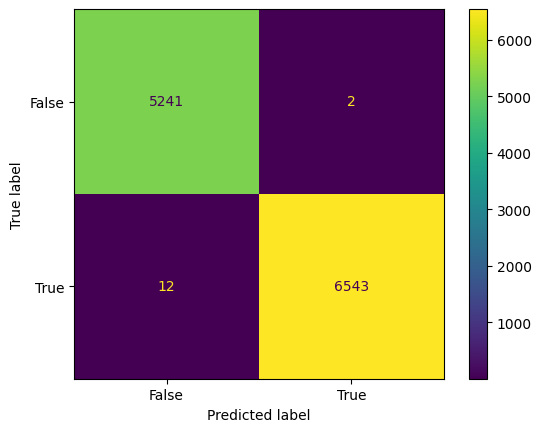

In [99]:
print("Le meilleur paramètre de SVM est  --> " ,parameters_SVM)
print(classification_report(y_test_balanced,pred))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test_balanced,pred), display_labels = [False, True])
cm_display.plot()
plt.show()

# <font color=orange> TEST  - Application des classfieurs sur le training test : <font> 

 <font color=orange>  pretraitement de "testalltxts" <font>

In [151]:
testalltxts = [pretraitement(i) for i in testalltxts]
print("Taille du set de test apres le prétraitement:" ,len(X_test))

Taille du set de test apres le prétraitement: 17224


<font color=orange>  pretraitement louise <font>

In [203]:
def preprocess(text):
    ## removing punctuation
    punc = string.punctuation  
    punc += '\n'
    text = text.translate(str.maketrans(punc, ' ' * len(punc)))  

    ## putting text to lower case
    text = text.lower()

    return(text)

<font color=orange>  Corriger le dataset afin d'enlever les exeptions '-1 'et ' 1 ' <font>

In [218]:
def corr_outlier (set):
    y_train_corr = [0]*len(set)
    print(len(y_train_corr))
    liste_un = 0

    y_train_corr[0] = set[0]
    y_train_corr[-1] = set[-1]

    for i in testalllabs:
        if i == 1: 
            liste_un +=1 
        
    for i in range(2, len(set)-1):
            if set[i-1] == set[i+1] == 1:
                y_train_corr[i] = 1
            elif set[i-1] == set[i+1] == -1:
                y_train_corr[i] = -1
            else : y_train_corr[i] = set[i]

    liste_corr = 0
    for i in range(0,len(y_train_corr)): 
        if i == 1 :
            liste_corr += 1 

    print(" AVANT ")  
    print ("La taille set corrgigé==> ", len(set))       
    print("La proportion d'etiquettes 1 est de:", liste_un/(len(set)*100))
    print("La proportion d'etiquettes -1 est de:", (100 - liste_un/len(set)*100))     

    print(" APRES")   
    print ("La taille set corrgigé==> ", len(y_train_corr))       
    print("La proportion d'etiquettes 1 est de:", liste_corr/(len(y_train_corr)*100))
    print("La proportion d'etiquettes -1 est de:", (100 - liste_corr/len(y_train_corr)*100))


    return y_train_corr

In [ ]:
# testalltxts,testalllabs
corr_outlier(testalllabs)

<font color=orange>  NB <font>

In [ ]:
### NB 
f1_nb = []
vectorizer_NB = CountVectorizer(max_df = 0.05, min_df = 1, ngram_range=(1,3),strip_accents='ascii',preprocessor=preprocess) 
X_nb = vectorizer_NB.fit_transform(X_train_balanced)
print(X_nb [:2])

X_test = vectorizer_NB.transform(testalltxts)
print(X_test[:2])


start_nb = time.time()
nb_clf= MultinomialNB(alpha = 0.0001)
nb_clf.fit(X_nb, y_train_balanced)
end_nb = time.time()

pred_nb = nb_clf.predict(X_test)

#### EVALUATION DES PERFORMANCES 
score_f1 = f1_score(testalllabs, pred_nb )



In [227]:
print("le score f1 est :", score_f1)
print(classification_report(testalllabs, pred_nb))

le score f1 est : 0.4589693491268774
              precision    recall  f1-score   support

          -1       0.10      0.66      0.18      2918
           1       0.88      0.31      0.46     24244

    accuracy                           0.35     27162
   macro avg       0.49      0.48      0.32     27162
weighted avg       0.80      0.35      0.43     27162



<font color=orange>  Regression logistique <font>

In [ ]:
f1_lr = []

vectorizer_LR= CountVectorizer(min_df = 1, max_df = 0.10,ngram_range=(1,3))

X_lr = vectorizer_NB.fit_transform(X_train_balanced)
print(X_nb [:2])

X_test= vectorizer_NB.transform(testalltxts)
print(X_test[:2])


start_lr = time.time()
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',n_jobs=-1, C= 1000, penalty = 'l2')
lr_clf.fit(X_lr, y_train_balanced)
end_lr = time.time()

pred_lr = lr_clf.predict(X_test)

#### EVALUATION DES PERFORMANCES 
score_f1 = f1_score(testalllabs, pred_lr)

In [183]:
print("le score f1 est :", score_f1)

le score f1 est : 0.6620928013205746


<font color=orange>  Regression logistique liblineaire <font>

In [197]:
f1_lr = []

vectorizer_LRlib= CountVectorizer(min_df = 3, max_df = 0.5,ngram_range=(1,3))

X_lrlib = vectorizer_LRlib.fit_transform(X_train_balanced)
print(X_nb [:2])

X_test= vectorizer_LRlib.transform(testalltxts)
print(X_test[:2])


start_lrlib = time.time()
lrlib_clf = LogisticRegression(C=10, n_jobs=-1, random_state=0, solver='liblinear')
lrlib_clf.fit(X_lrlib, y_train_balanced)
end_lrlib = time.time()

pred_lrlib = lrlib_clf.predict(X_test)

#### EVALUATION DES PERFORMANCES 
score_f1 = f1_score(testalllabs, pred_lrlib)

In [198]:
print("le score f1 est :", score_f1)

le score f1 est : 0.49877505239233744


<font color=orange> SVM <font>

In [ ]:
f1_lr = []

vectorizer_svm= CountVectorizer(min_df = 1, max_df = 0.5,ngram_range=(1,3))

X_svm = vectorizer_svm.fit_transform(X_train_balanced)
print(X_svm [:2])

X_test= vectorizer_svm.transform(testalltxts)
print(X_test[:2])


start_svm = time.time()
svm_clf = LinearSVC(C=0.1, random_state=0, tol=1e-05)
svm_clf.fit(X_lrlib, y_train_balanced)
end_svm = time.time()

pred_svm = svm_clf.predict(X_test)

#### EVALUATION DES PERFORMANCES 
score_f1 = f1_score(testalllabs, pred_svm)

In [201]:
print("le score f1 est :", score_f1)

le score f1 est : 0.48438434845040085


### <font color=beige> Entrainement sur données NON-requilibrées </font>

In [54]:
X_train_unbal,y_train_unbal,X_test_unbal,y_test_unbal = X_train,y_train,X_test,y_test

<font color=yellow> Inversemet des etiquettes </font>

In [ ]:
reverse_label(y_train_unbal)
reverse_label(y_test_unbal)

<font color=yellow> pré-traitement </font>

In [ ]:
X_train_unbal = [pretraitement(i) for i in X_train_unbal]
X_test_unbal = [pretraitement(i) for i in X_test_unbal]

<font color=beige> Greed-search avec une fonction de coût qui pénalise plus les erreurs dans la classe minoritaire: </font>
 - definition de la fonction de côut 
 - gridsearchCV
</font>

In [89]:
## weight that will minimize the error in our predictions.
weight = 1 - (sum(y_train_unbal)/len(y_train_unbal))/((sum(y_train_unbal)/len(y_train_unbal)) + (1 - (sum(y_train_unbal)/len(y_train_unbal))))
print(weight)

0.2609171663888129


In [ ]:
def weighted_binary_crossentropy(y_train_unbal, y_pred, weight):
    n_pos = np.sum(y_train == 1)
    n_neg = np.sum(y_train != 1)
    loss = -1 *  weight * (n_pos * np.log(y_pred) + n_neg * np.log(1 - y_pred))
    return loss

loss_liste = []
weight_liste = [0.1,0.3,0.5,0.7,0.9]
for i in [0.1,0.3,0.5,0.7,0.9] : 
        n_pos = np.sum(y_train == 1)
        n_neg = np.sum(y_train != 1)
        loss = -1 * i * (n_pos * np.log(y_test_unbal) + n_neg * np.log(1 - y_test_unbal))
        loss_liste.append(loss)

In [62]:
### NB parametre alpha 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

vectorizer= CountVectorizer(max_df = 0.5, min_df = 9, ngram_range=(1,3))
X_boost_nb = vectorizer.fit_transform(X_train_unbal)
X_test_unbal = vectorizer.transform(X_train_unbal)

X_test_unbal.reshape(1,-1)
X_boost_nb.reshape(1,-1)

params_nb = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}

nb_clf = MultinomialNB(class_weight = 'balanced')
grid_search = GridSearchCV(nb_clf, param_grid=params_nb, scoring='f1', n_jobs=3, cv = 3,loss = loss)
grid_search.fit(X_boost_nb, y_train_unbal)

best_parameter = grid_search.best_params_['alpha']
print(best_parameter)

grid_search.best_estimator_.score(X_boost_nb,y_train_unbal)
pred=grid_search.predict(X_test_unbal)
print('confusion Matrix', classification_report(y_test_unbal,pred))

NameError: name 'y_pred' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### SVM  

X_boost_svm = vectorizer.fit_transform(X_train)
params_svm = {'C':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

svm_clf = LinearSVC()
grid_search = GridSearchCV(svm_clf, param_grid=params_svm, scoring='accuracy', n_jobs=3)
grid_search.fit(X_boost_svm, y_train)

best_parameter = grid_search.best_params_
print(grid_search.best_params_)

In [ ]:
### Logistic regression
X_boost_lr = vectorizer.fit_transform(X_train_unbal)
params_lr = {'C':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':('l1','l2')},##'solver':('liblinear','lbfgs')}

svm_clf = LogisticRegression(class_weight = 'balanced')
grid_search = GridSearchCV(svm_clf, param_grid=params_lr, scoring='roc_auc_ovr_weighted', n_jobs=3,cv = 10)
grid_search.fit(X_boost_lr, y_train_unbal)

best_parameter = grid_search.best_params_
print(grid_search.best_params_)
grid_search .best_estimator_.score(X_train_unbal,y_train_unbal)
pred=grid_search.predict(X_test_unbal)
print('confusion Matrix', classification_report(y_test_unbal,pred))